In [1]:
import geopandas
from matplotlib import pyplot as plt
import pandas as pd
import os

/home/sunild/.local/lib/python3.8/site-packages/matplotlib_inline/config.py:66: DeprecationWarning: InlineBackend._figure_formats_changed is deprecated in traitlets 4.1: use @observe and @unobserve instead.
  def _figure_formats_changed(self, name, old, new):


In [2]:
'''
to avoid annoying pandas warnings 
we use warnings module
''' 
import warnings
warnings.filterwarnings("ignore")

In [38]:
district_geo=geopandas.read_file('datasets/geo_maps/gadm36_IND_2.shp')
GEO_STATES=list(district_geo.NAME_1.unique())
district_geo.iloc[GEO_STATES.index('Andaman and Nicobar'),3]='Andaman and Nicobar Islands'
district_geo.iloc[GEO_STATES.index('Telangana'),3]='Telangana '
district_geo.NAME_2=district_geo.NAME_2.str.lower()

Obviously there are going to be lots of name mistmatches in both datasets. We keep them as it is, as we will see that most of the districts are intact. We will be merging teo data frames on `NAME_2` this time.

In [31]:
crop_data=pd.read_csv('datasets/crop_production.csv')
crop_data.dropna(inplace=True)
crop_data.District_Name=crop_data.District_Name.str.lower()

In [8]:
print('total states in crop-production dataset',len(crop_data.District_Name.unique()))

total states in crop-production dataset 646


In [9]:
print('total states in crop-production dataset',len(district_geo.NAME_2.unique()))

total states in crop-production dataset 659


In [19]:
def geo_plot(dataset,label):
    # global merged_data
    ax=dataset.plot(
        column=label,
        legend=True,
        figsize=(12,8),
        cmap='winter',
        edgecolor='black',
        missing_kwds={
            'color':'white',
            'hatch':'///',
            'edgecolor':'black'
        },
        )
    ax.set_axis_off()
    ax.set_title(label)
    # plt.show()
    return None

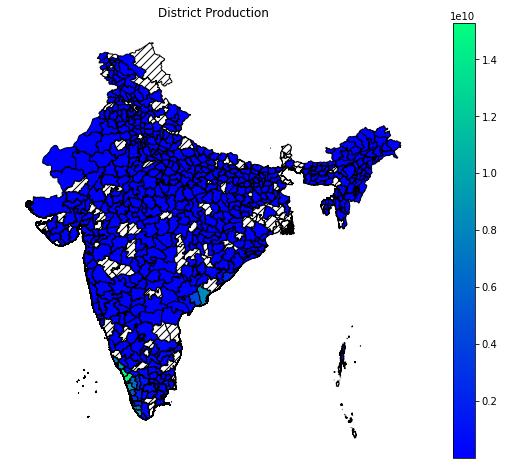

In [20]:
prod_district_wise=crop_data.groupby(by='District_Name')['Production','District_Name'].sum()

foo_df2=pd.DataFrame({'NAME_2':prod_district_wise.index,'District Production':prod_district_wise.Production})

merge_df=pd.merge(district_geo,foo_df2,on='NAME_2',how='outer')

geo_plot(merge_df,'District Production')

Points:
- Clearly only 4-5 districts can be seen seperatly in this blue wave. There names are given in below block's output:

In [24]:
print('Top production districts are:\n',crop_data.groupby('District_Name')['District_Name','Production'].sum().sort_values('Production',ascending=False).head(3))

Top production districts are:
                       Production
District_Name                   
kozhikode           1.528074e+10
malappuram          1.451840e+10
thiruvananthapuram  1.002271e+10


Possible Future Explorations:
- Similarly, for districts also we can create animated gifs that shows how production of crops have changed in various districts over these 19 years(1997-2015).
- Also whatever we did for states can be done for districts but since districts are very tiny and generally we don't knwo their names it seems to be quite complicated to mine any note worthy info at India level. Rather we can explore the situation state-by-state basis, that way we have smaller points to llok at and infering info is reletively easy.
- We will do this analysis for three states:
    - Rajasthan
    - Kerela
    - Punjab
- similar techniques can be used to analyse other states; just change the name of state

In [34]:
STATES=list(crop_data.State_Name.unique())

In [28]:
states=['Rajasthan','Punjab','Kerala']

ValueError: cannot convert float NaN to integer

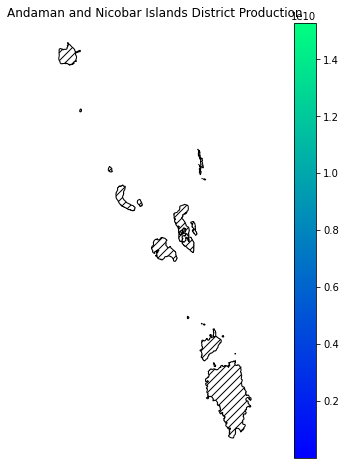

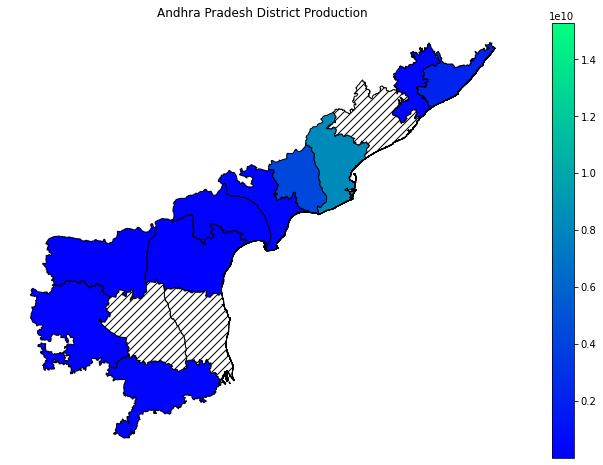

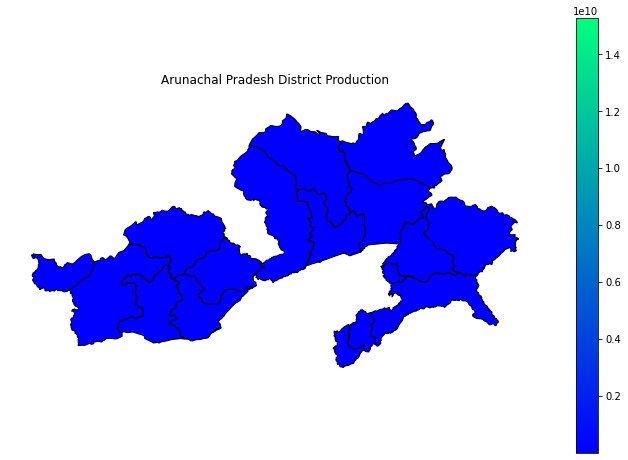

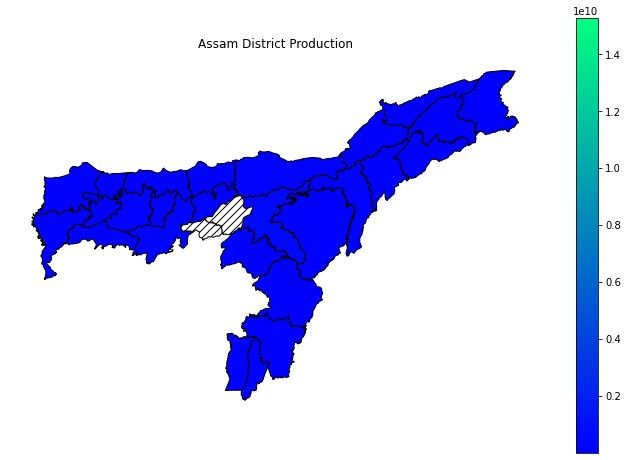

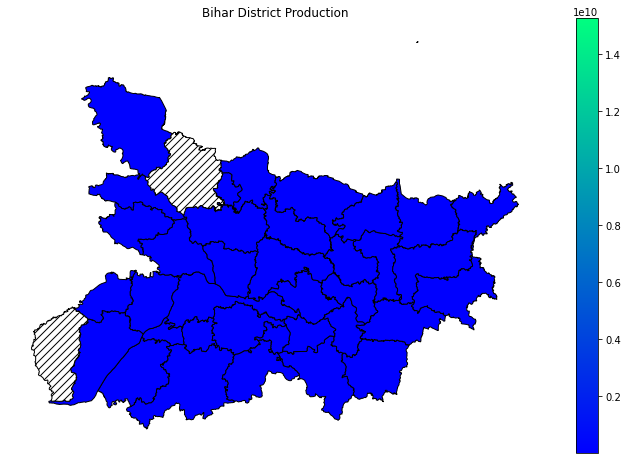

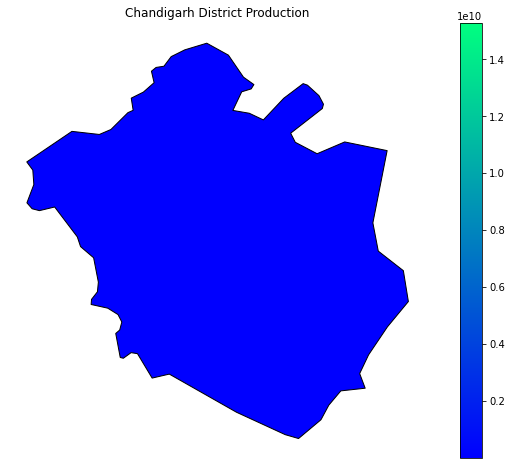

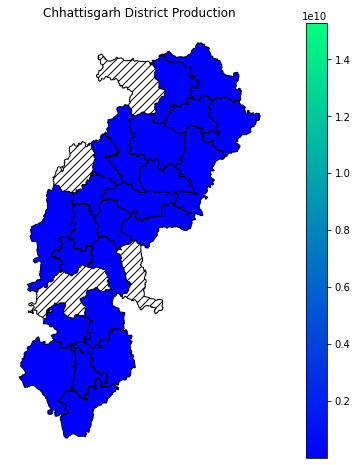

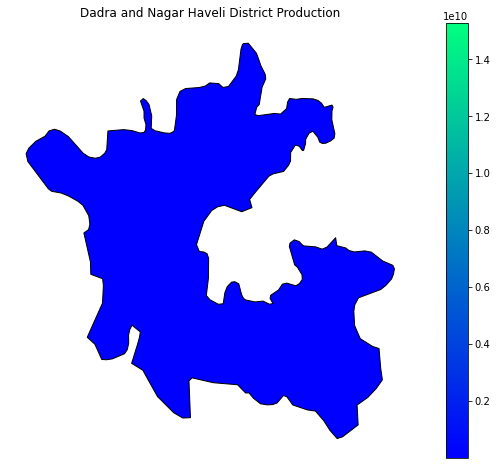

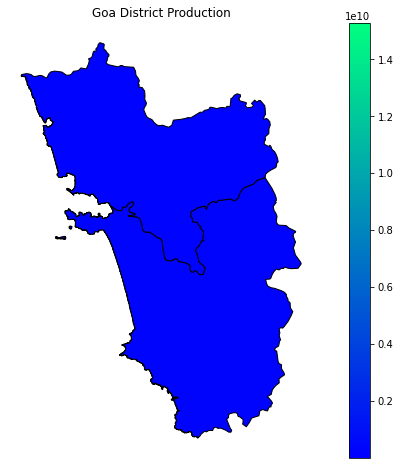

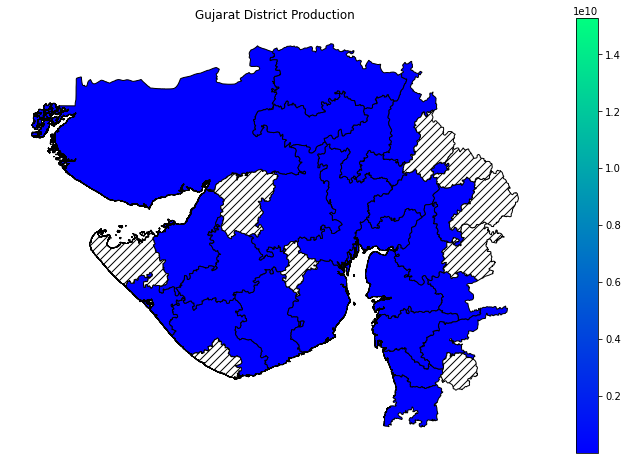

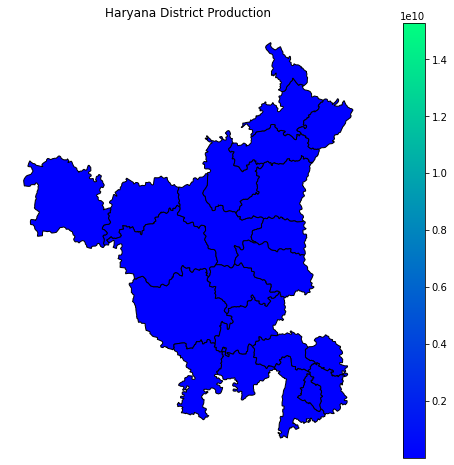

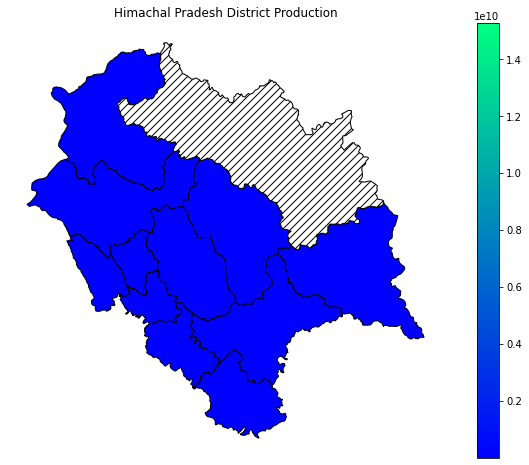

ValueError: cannot convert float NaN to integer

In [39]:
for state in STATES:

    state_df=crop_data[crop_data.State_Name==state]

    prod_district_wise=crop_data.groupby(by='District_Name')['Production','District_Name'].sum()

    foo_df2=pd.DataFrame({'NAME_2':prod_district_wise.index,f'{state} District Production':prod_district_wise.Production})

    merge_df=pd.merge(district_geo[district_geo.NAME_1==state],foo_df2,on='NAME_2',how='outer')

    geo_plot(merge_df,f'{state} District Production')